In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Railway_info.csv")
print("First 10 Rows:")
print(df.head(10))
print("\nData Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

First 10 Rows:
   Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
9       504  PNBE-BTI FTR                     PATNA JN.   

             Destination_Station_Name       days  
0                         MADGOAN JN.   Saturday  
1                     SAWANTWADI ROAD     Friday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                   DELHI-SAFDAR JANG  Wednesday  
4                        VARANASI JN.   Saturday  
5        SHRI MATA VAISHNO DE

In [12]:
# Task 1.2
num_trains = df['Train_No'].nunique()
num_unique_sources = df['Source_Station_Name'].nunique()
num_unique_destinations = df['Destination_Station_Name'].nunique()
most_common_source = df['Source_Station_Name'].value_counts().idxmax()
most_common_destination = df['Destination_Station_Name'].value_counts().idxmax()

print(f"\nTotal Unique Trains: {num_trains}")
print(f"Unique Source Stations: {num_unique_sources}")
print(f"Unique Destination Stations: {num_unique_destinations}")
print(f"Most Common Source Station: {most_common_source}")
print(f"Most Common Destination Station: {most_common_destination}")


Total Unique Trains: 11113
Unique Source Stations: 921
Unique Destination Stations: 924
Most Common Source Station: CST-MUMBAI
Most Common Destination Station: CST-MUMBAI


In [13]:
# Task 1.3:
df.dropna(inplace=True)
df['Source_Station_Name'] = df['Source_Station_Name'].str.upper()
df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper()

In [14]:
# Task 2.1
saturday_trains = df[df['days'].str.lower() == 'saturday']
print("\nTrains Operating on Saturdays:\n", saturday_trains.head())
specific_station = 'DELHI'
from_specific_station = df[df['Source_Station_Name'].str.contains(specific_station.upper())]
print(f"\nTrains from station containing '{specific_station}':\n", from_specific_station.head())


Trains Operating on Saturdays:
     Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
0        107  SWV-MAO-VLNK     SAWANTWADI ROAD              MADGOAN JN.   
4        401  BSB BHARATDA          AURANGABAD             VARANASI JN.   
21      1196  NGP-KRMI SPL      NAGPUR JN.(CR)                  KARMALI   
28      1706   JBP-BDTS SF            JABALPUR          BANDRA TERMINUS   
45      2834  SRC-RJT SF A     SANTRAGACHI JN.                   RAJKOT   

        days Day_Category  
0   Saturday      Weekend  
4   Saturday      Weekend  
21  Saturday      Weekend  
28  Saturday      Weekend  
45  Saturday      Weekend  

Trains from station containing 'DELHI':
      Train_No        Train_Name Source_Station_Name  \
3         290      PALACE ON WH   DELHI-SAFDAR JANG   
12      22439  SVDK VANDEBHARAT           NEW DELHI   
24       1442      DSJ-KK MTY S   DELHI-SAFDAR JANG   
62       4409      DLI-SVDK SPL           DELHI JN.   
138      6412      DSJ-PAY EZHI

In [15]:
# Task 2.2
trains_per_station = df.groupby('Source_Station_Name')['Train_No'].count().sort_values(ascending=False)
print("\nTrains Per Source Station:\n", trains_per_station)

avg_trains_per_day = df.groupby(['Source_Station_Name', 'days'])['Train_No'].count().groupby('Source_Station_Name').mean()
print("\nAverage Trains per Day per Station:\n", avg_trains_per_day)


Trains Per Source Station:
 Source_Station_Name
CST-MUMBAI           513
SEALDAH              372
CHENNAI BEACH        339
HOWRAH JN.           338
KALYAN JN            285
                    ... 
HOSPET JN.             1
SAWAI MADHOPUR JN      1
HAZARIBAGH ROAD        1
HATHRAS JN.            1
KENDUJHAR              1
Name: Train_No, Length: 921, dtype: int64

Average Trains per Day per Station:
 Source_Station_Name
ABHANPUR JN.      1.000000
ABOHAR            1.000000
ABU ROAD          1.000000
ACHHNERA JN.      1.000000
ADILABAD          1.250000
                    ...   
WARASEONI         1.000000
WARDHA JN.        1.000000
WHITE FIELD       1.000000
YAMUNA BRIDGE     1.000000
YESVANTPUR JN.    8.571429
Name: Train_No, Length: 921, dtype: float64


In [16]:
# Task 2.3
def categorize_day(day):
    if day.lower() in ['saturday', 'sunday']:
        return 'Weekend'
    return 'Weekday'

df['Day_Category'] = df['days'].apply(categorize_day)

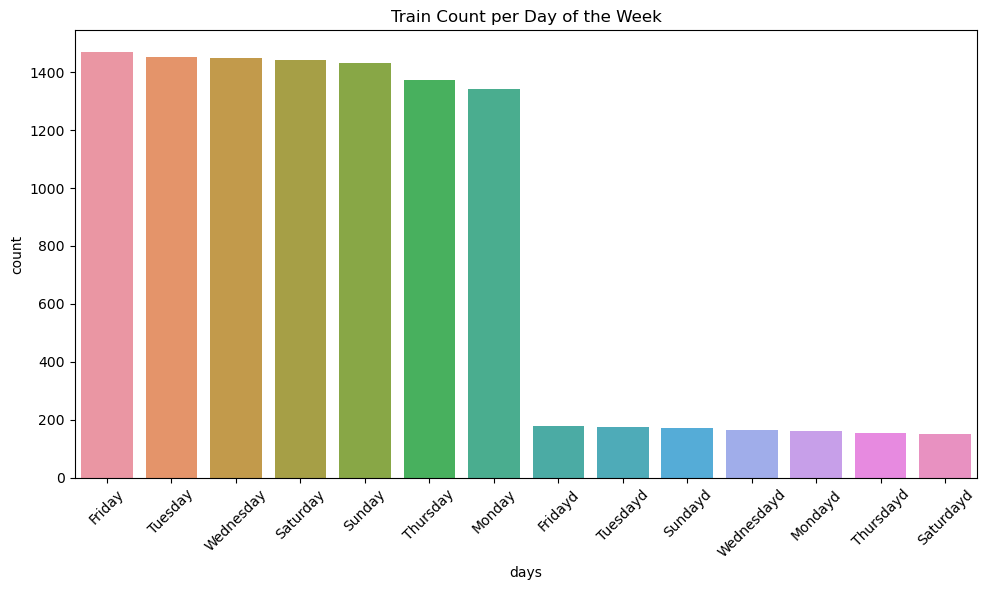

In [17]:
# Task 3.1
plt.figure(figsize=(10, 6))
sns.countplot(x='days', data=df, order=df['days'].value_counts().index)
plt.title("Train Count per Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
top_routes = df.groupby(['Source_Station_Name', 'Destination_Station_Name'])['Train_No'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Source-Destination Routes:\n", top_routes)


Top 10 Source-Destination Routes:
 Source_Station_Name  Destination_Station_Name
TAMBARAM             CHENNAI BEACH               137
CHENNAI BEACH        TAMBARAM                    137
CST-MUMBAI           PANVEL                       94
PANVEL               CST-MUMBAI                   93
CST-MUMBAI           RAVLI JN                     90
RAVLI JN             CST-MUMBAI                   90
VELACHEERY           CHENNAI BEACH                89
CHENNAI BEACH        VELACHEERY                   87
CST-MUMBAI           THANE                        77
THANE                CST-MUMBAI                   72
Name: Train_No, dtype: int64


In [18]:
# Task 3.2
day_counts = df['days'].value_counts()
print("\nTrain Frequency by Day:\n", day_counts)


Train Frequency by Day:
 days
Friday        1471
Tuesday       1454
Wednesday     1448
Saturday      1441
Sunday        1432
Thursday      1372
Monday        1342
Fridayd        178
Tuesdayd       174
Sundayd        170
Wednesdayd     164
Mondayd        161
Thursdayd      154
Saturdayd      152
Name: count, dtype: int64


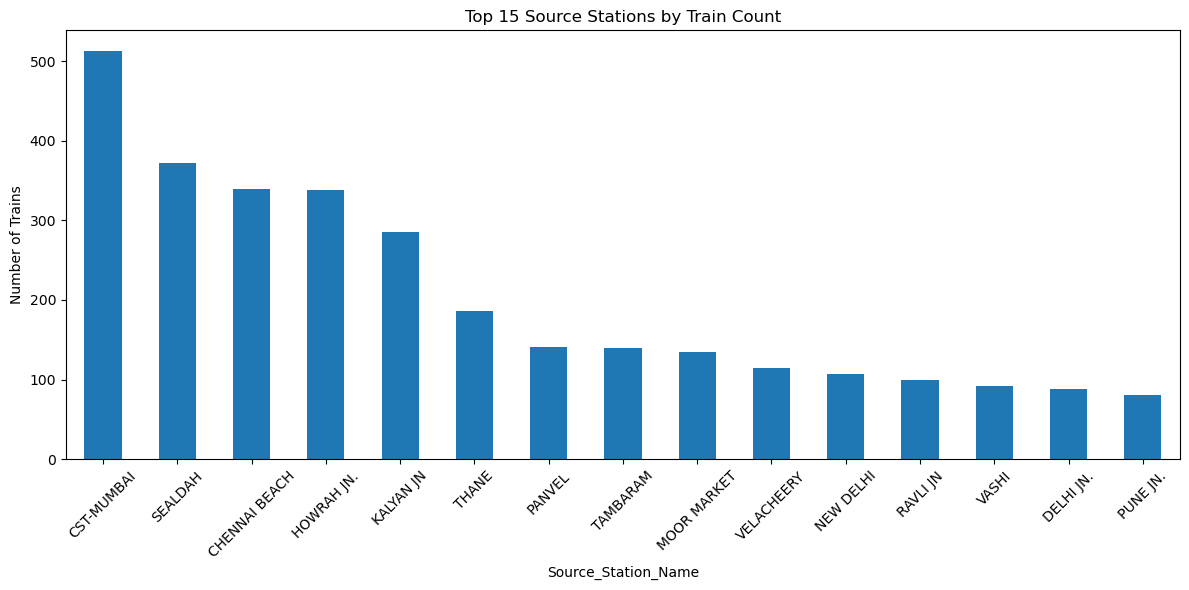

In [22]:
# Task 4.1
plt.figure(figsize=(12, 6))
trains_per_station.head(15).plot(kind='bar')
plt.title("Top 15 Source Stations by Train Count")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

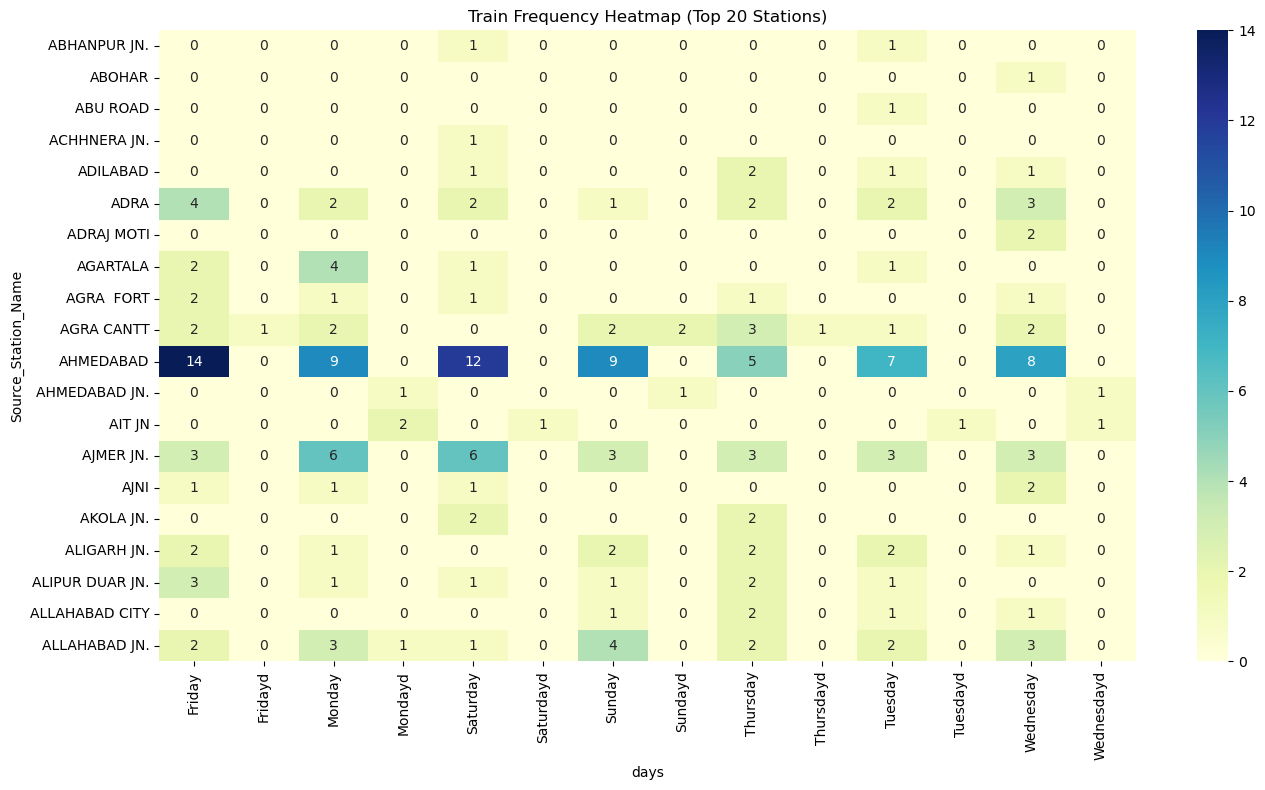

In [21]:
pivot_table = df.pivot_table(index='Source_Station_Name', columns='days', values='Train_No', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table.head(20), cmap='YlGnBu', annot=True, fmt='d')
plt.title("Train Frequency Heatmap (Top 20 Stations)")
plt.tight_layout()
plt.show()